In [ ]:
SALES DATA ANALYSIS
  Purpose:
This project involves analyzing sales data over a specific period to identify trends and patterns that help businesses make informed, data-driven decisions. 
By understanding sales performance, companies can better forecast future sales and optimize their marketing and inventory strategies.
  Tech Stack:
1.Pandas: Used for data cleaning, transformation, and analysis.
2.Matplotlib: Used for visualizations such as line charts and bar graphs to clearly represent trends over time.
3.Seaborn: For statistical and enhanced visualizations.
4.NumPy was used for efficient numerical operations, such as working with arrays, performing calculations, and supporting data manipulation in Pandas (since Pandas is built on top of NumPy).
 Insights Derived:
The analysis reveals:
1.Peak sales periods
2.Seasonal trends
3.The impact of discounts or promotions
4.Product categories with the highest and lowest sales
5.Regional performance variations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')  # or 'ISO-8859-1'
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [11]:
df.shape

(9994, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [25]:
#pre_processing
df.isnull().sum() 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [32]:
#Data Analysis
corrmat = df.corr(numeric_only=True)
print(corrmat)

               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000


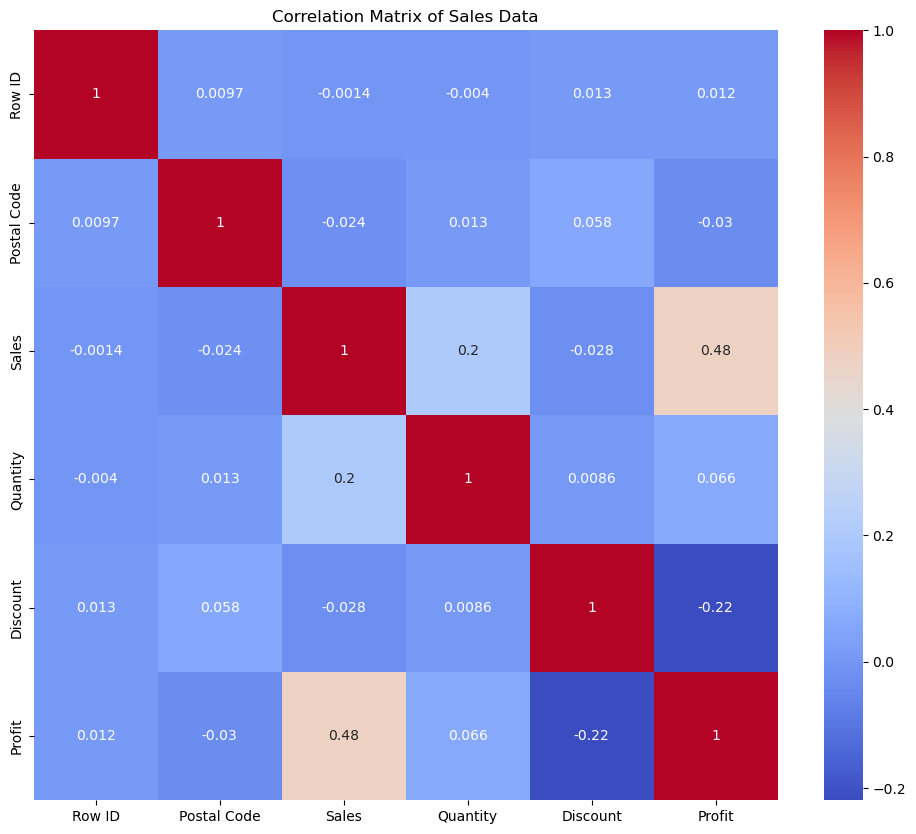

In [34]:
#corrolation Matrix as heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Data')
plt.show()

In [43]:
print(df.columns.tolist())

['Order Date', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity']


In [48]:
#Determining the categories in the Country column of the dataframe
df['Country'].unique()

array(['United States'], dtype=object)

In [51]:
states=df['State'].unique()
np.count_nonzero(states) #number of ststes in us

49

In [54]:
cities=df['City'].unique()
np.count_nonzero(cities) #number of cities

531

In [57]:
top_cities=df['City'].value_counts().nlargest(20) #top-cities
top_cities

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: count, dtype: int64

In [60]:
top_customers=df['Customer Name'].value_counts().nlargest(20) #most frequent customers
top_customers

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Arthur Prichep         31
Lena Cacioppo          30
Sally Hughsby          29
Dean percer            29
Brian Moss             29
Greg Tran              29
Ken Lonsdale           29
Keith Dawkins          28
Clay Ludtke            28
Kunst Miller           28
Name: count, dtype: int64

In [62]:
rslt_df=df[df['Customer Name'] == 'William Brown'] 
rslt_df.head()

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
2133,11/30/2015,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,152.991,3
2134,11/30/2015,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,OFF-FA-10000053,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7
2135,11/30/2015,William Brown,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-PH-10002807,Technology,Phones,Motorla HX550 Universal Bluetooth Headset,94.920,4
2148,12/12/2014,William Brown,Consumer,United States,Concord,California,West,FUR-FU-10003975,Furniture,Furnishings,Eldon Advantage Chair Mats for Low to Medium P...,43.310,1
3741,1/15/2016,William Brown,Consumer,United States,New York City,New York,East,OFF-EN-10001137,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.520,4


In [65]:
# Category-wise Selection
category=df['Category'].unique()
print(category)
print(np.count_nonzero(category))

['Furniture' 'Office Supplies' 'Technology']
3


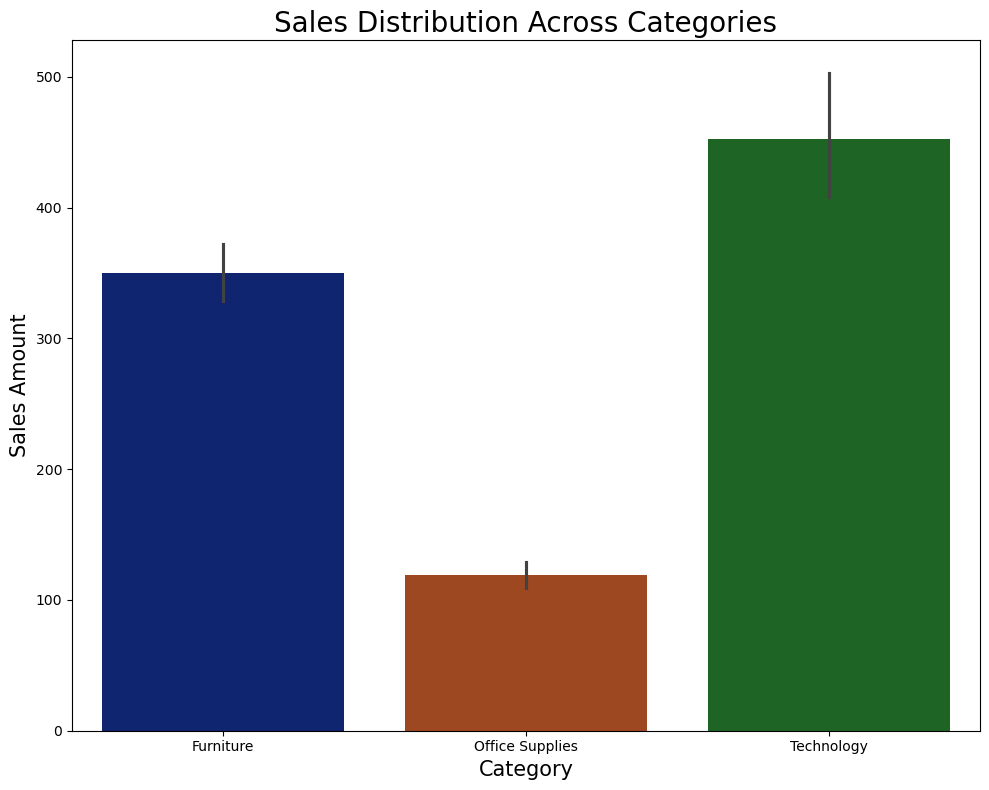

In [80]:
# Vizualizing the Distribution of Sales Across Categories
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(x='Category', y='Sales', hue='Category', data=df, palette='dark', legend=False)
plt.title('Sales Distribution Across Categories', fontsize=20)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Sales Amount', fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [83]:
# Totel count of sub-category 
subcategory=df['Sub-Category'].unique()
print(subcategory)
print(np.count_nonzero(subcategory))

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
17


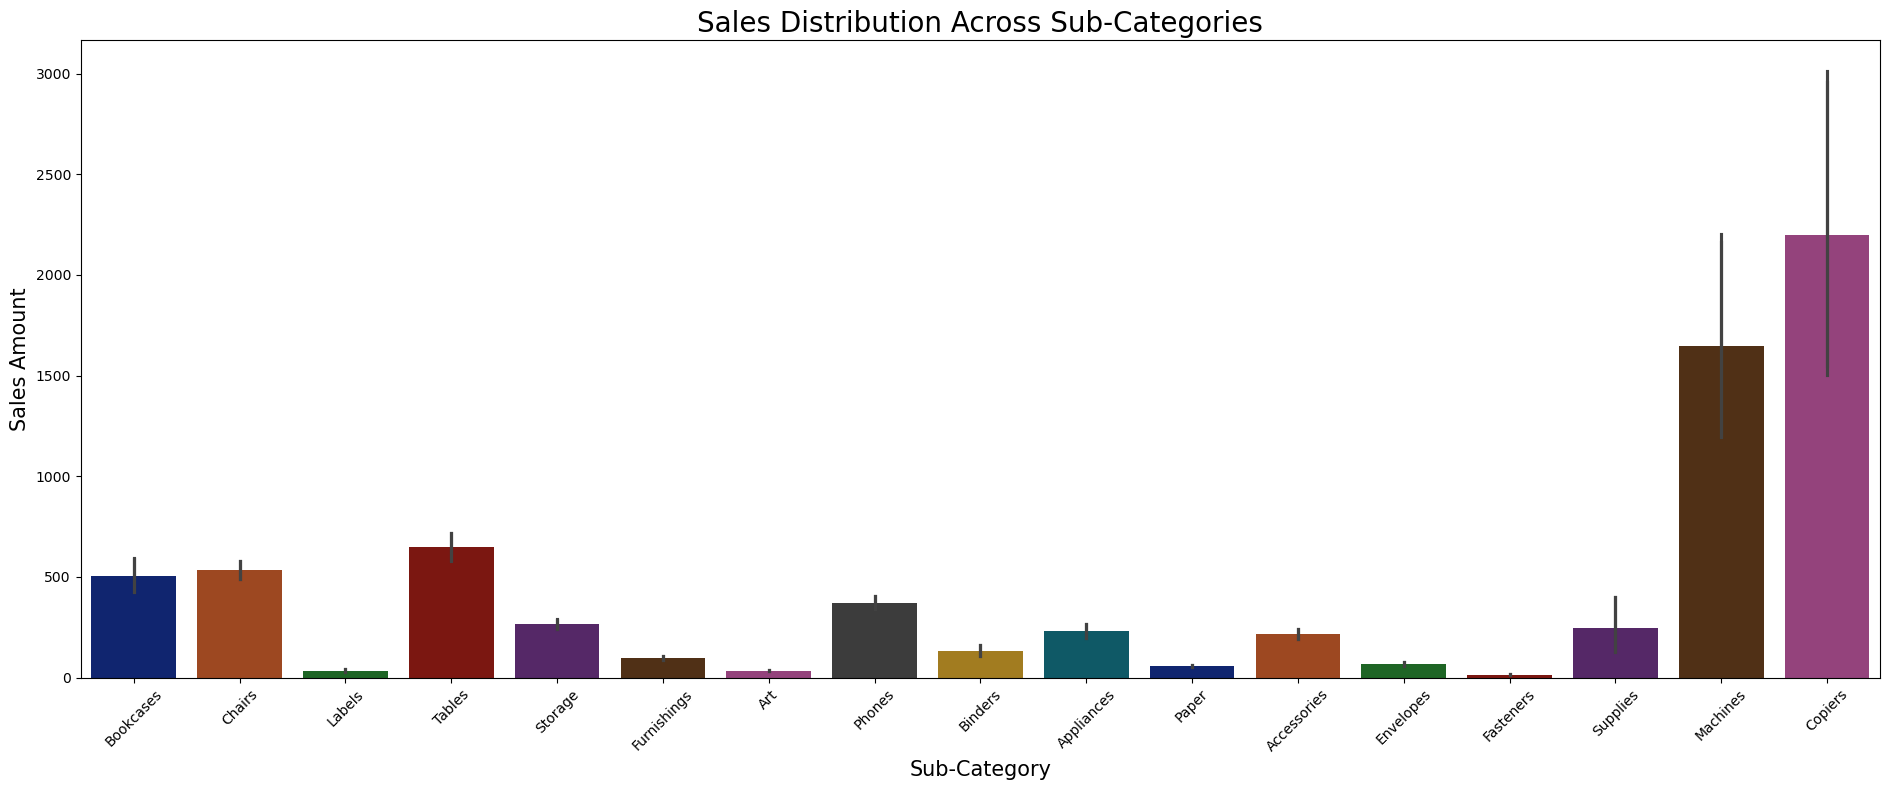

In [88]:
# visualizing sub-category wise distribution of sales
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(x='Sub-Category', y='Sales', hue='Sub-Category', data=df, palette='dark', legend=False)
plt.title('Sales Distribution Across Sub-Categories', fontsize=20)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Sales Amount', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
# Top 5 products highly in demand
top_products=df['Sub-Category'].value_counts().nlargest(5)
top_products

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: count, dtype: int64

In [93]:
# Determining Segments of customers
segment=df['Segment'].unique()
print(segment)
print(np.count_nonzero(segment))

['Consumer' 'Corporate' 'Home Office']
3


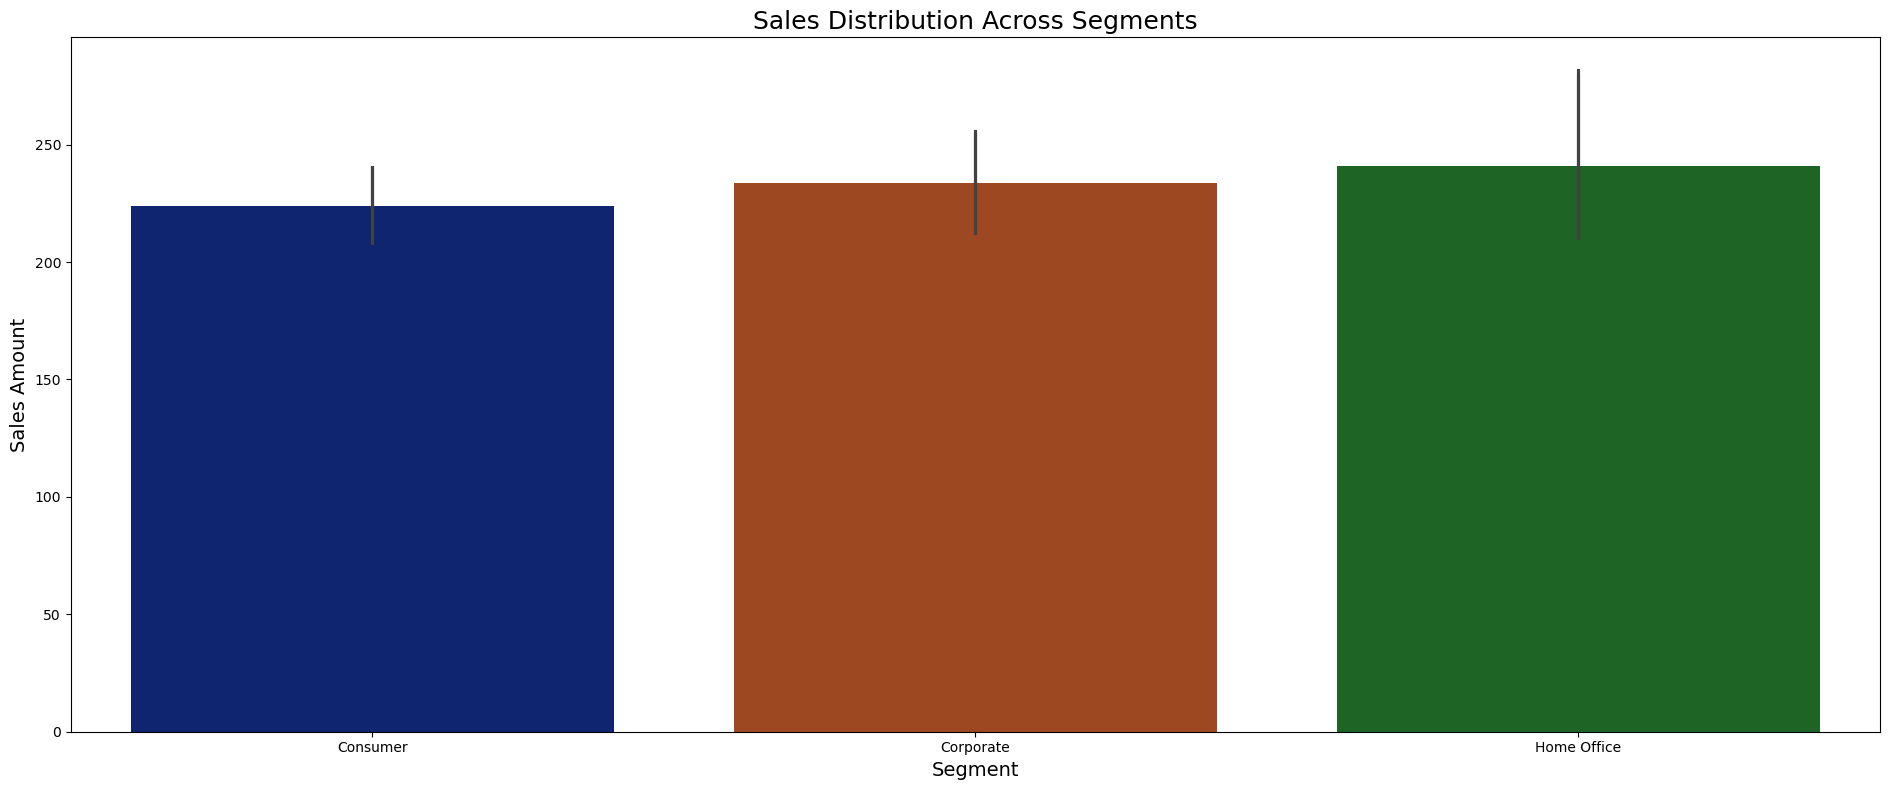

In [101]:
# Visualizing Segment wise distribution of sales
plt.rcParams['figure.figsize'] = (10, 6)
sns.barplot(x='Segment', y='Sales', hue='Segment', data=df, palette='dark', legend=False)
plt.title('Sales Distribution Across Segments', fontsize=18)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.tight_layout()
plt.show()

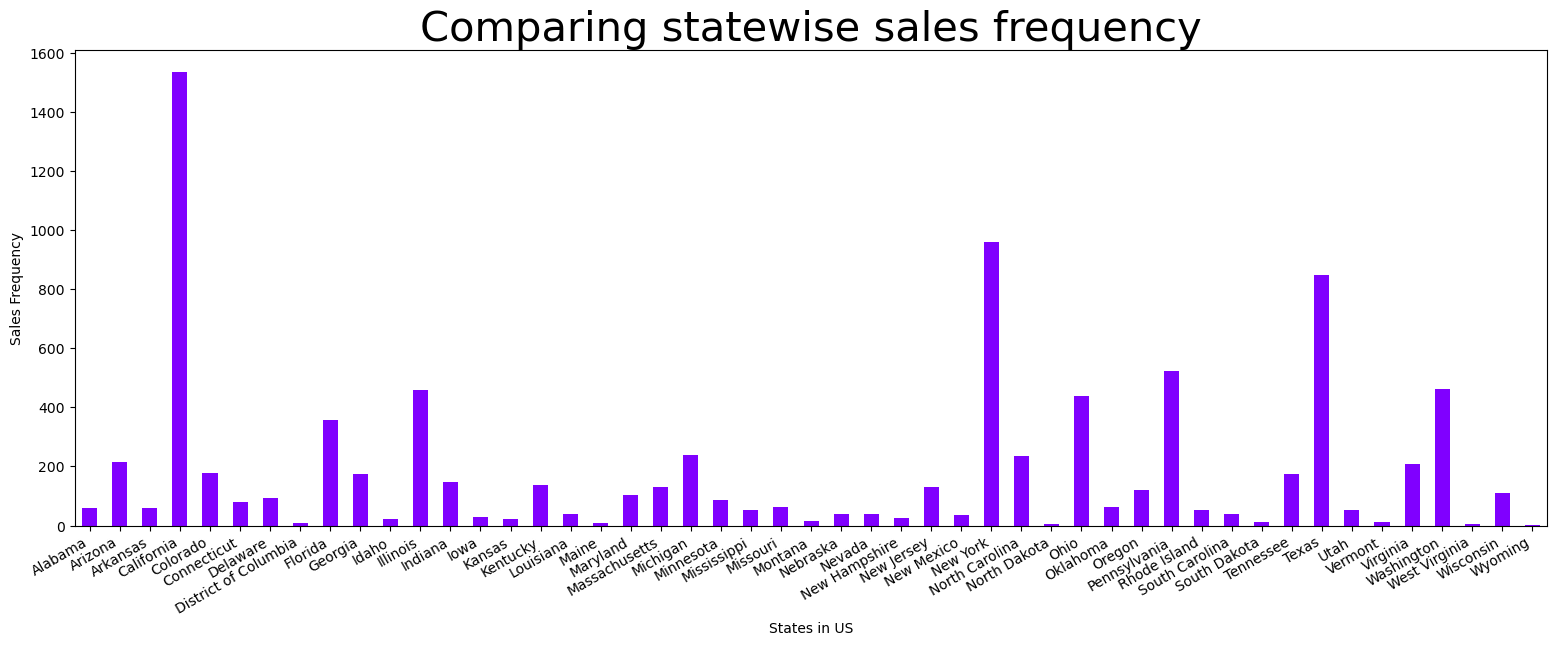

In [106]:
# Visualizing state-wise sales distribution
df.groupby(['State'])['Sales'].nunique().plot.bar(figsize = (19, 7), cmap= 'rainbow')
plt.gcf().autofmt_xdate()
plt.title('Comparing statewise sales frequency', fontsize = 30)
plt.xlabel('States in US', fontsize = 10)
plt.ylabel('Sales Frequency')
plt.show()

In [109]:
# Top states with high sales
top_states= df['State'].value_counts().nlargest(10)
top_states

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64

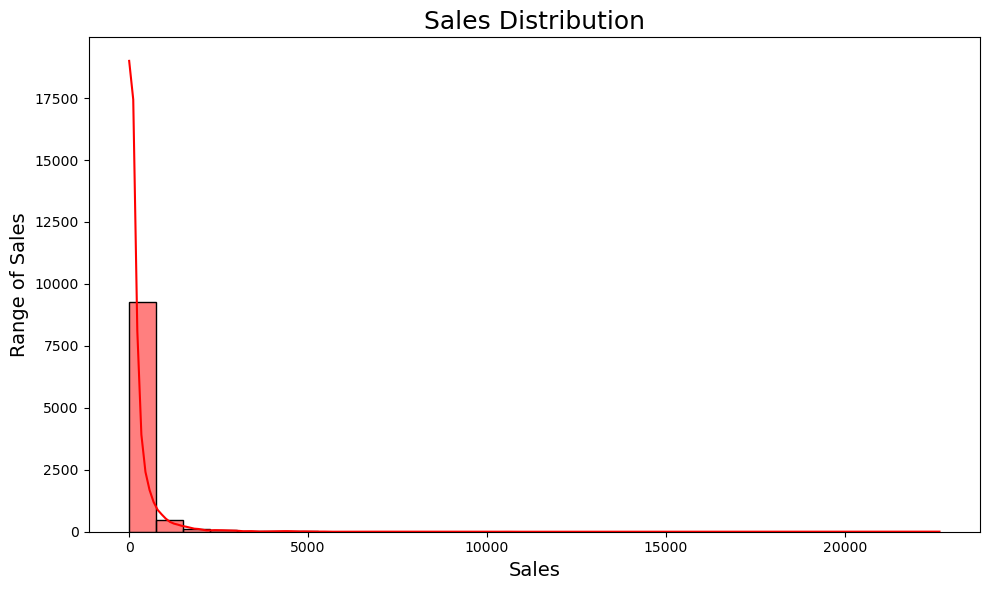

In [121]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.histplot(df['Sales'], color='red', kde=True, bins=30)
plt.title('Sales Distribution', fontsize=18)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Range of Sales', fontsize=14)
plt.tight_layout()
plt.show()

In [124]:
df.columns

Index(['Order Date', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity'],
      dtype='object')

In [126]:
# Separating dependent and independent features
X=df.copy()
X.drop(['Sales'],axis=1,inplace=True)
X.head() # independent features

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Quantity
0,11/8/2016,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2
1,11/8/2016,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,6/12/2016,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2
3,10/11/2015,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5
4,10/11/2015,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2


In [129]:
y=df.iloc[:,11] # dependent feature
y.head()

0    261.9600
1    731.9400
2     14.6200
3    957.5775
4     22.3680
Name: Sales, dtype: float64

In [159]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # converting to datetime
# Extracting year,month,date from 'Order Date' to analyze yearly trends
df['Year'] = df['Order Date'].dt.year  

In [161]:
df['Month'] = df['Order Date'].dt.month
#extracting Day out of the Date to do daywise analysis
df['Date'] = df['Order Date'].dt.day

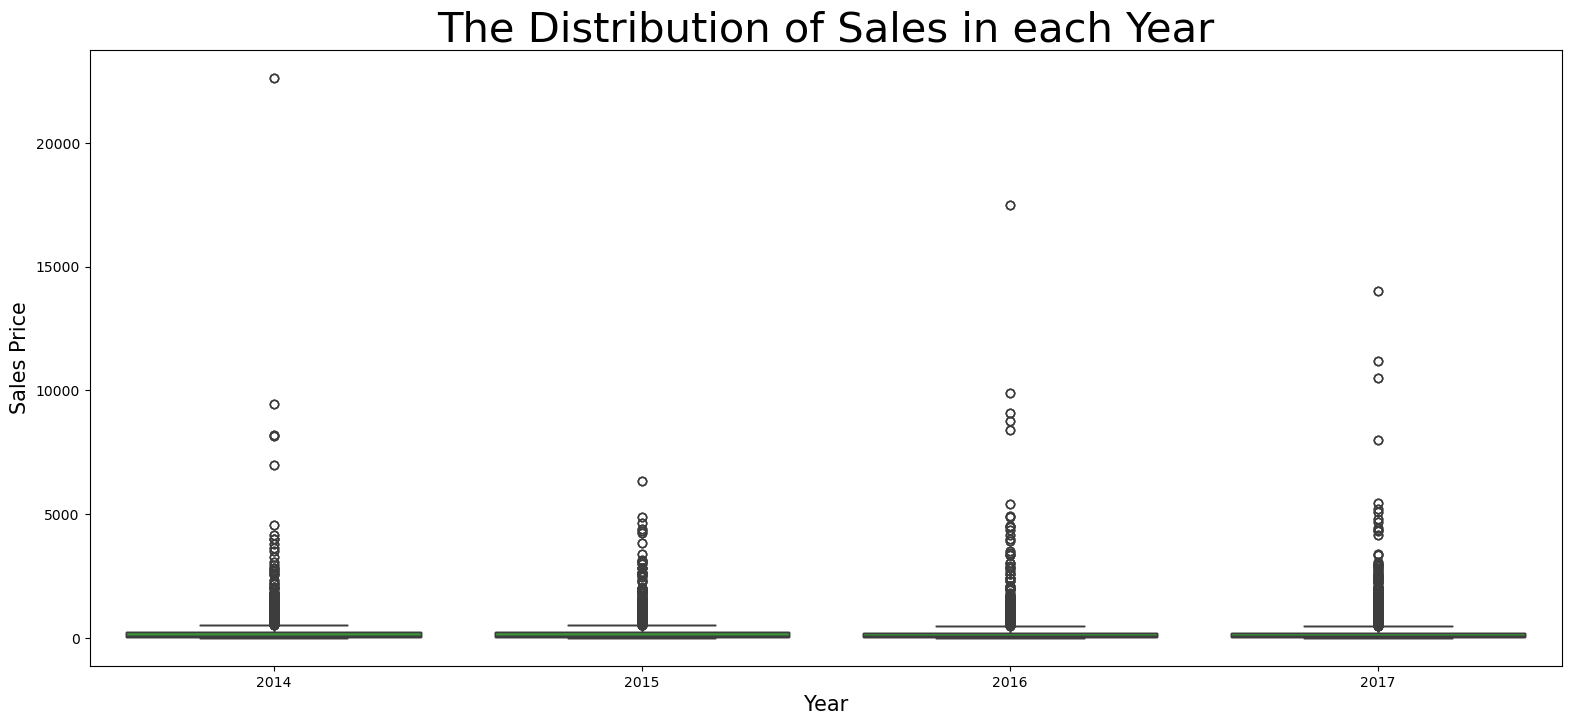

In [163]:
# Visualizing year-wise sales distribution
plt.rcParams['figure.figsize'] = (19, 8)
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('The Distribution of Sales in each Year', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sales Price', fontsize=15)
plt.show()

In [168]:
year_max=df[df['Sales'] == 22638.480000] 
year_max

,Order Date,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Year,Month,Date
2697,2014-03-18,Sean Miller,Home Office,United States,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,2014,3,18


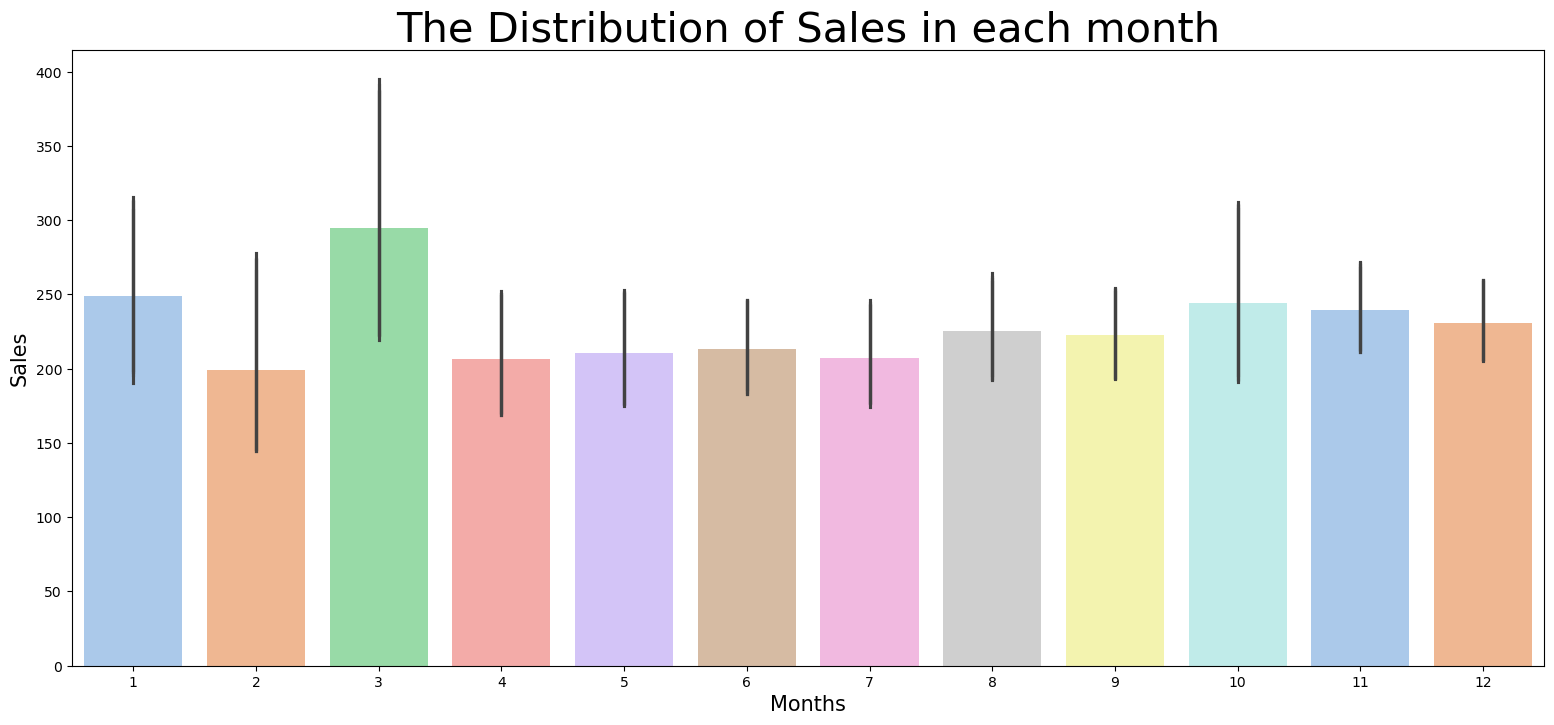

In [183]:
# Visualizing month-wise sales distribution
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x='Month', y='Sales', hue='Month', data=df, palette='pastel', legend=False)
plt.title('The Distribution of Sales in each month', fontsize=30)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales', fontsize=15)  
plt.show()

In [ ]:
# It is mostly observed highest at the mid of the month

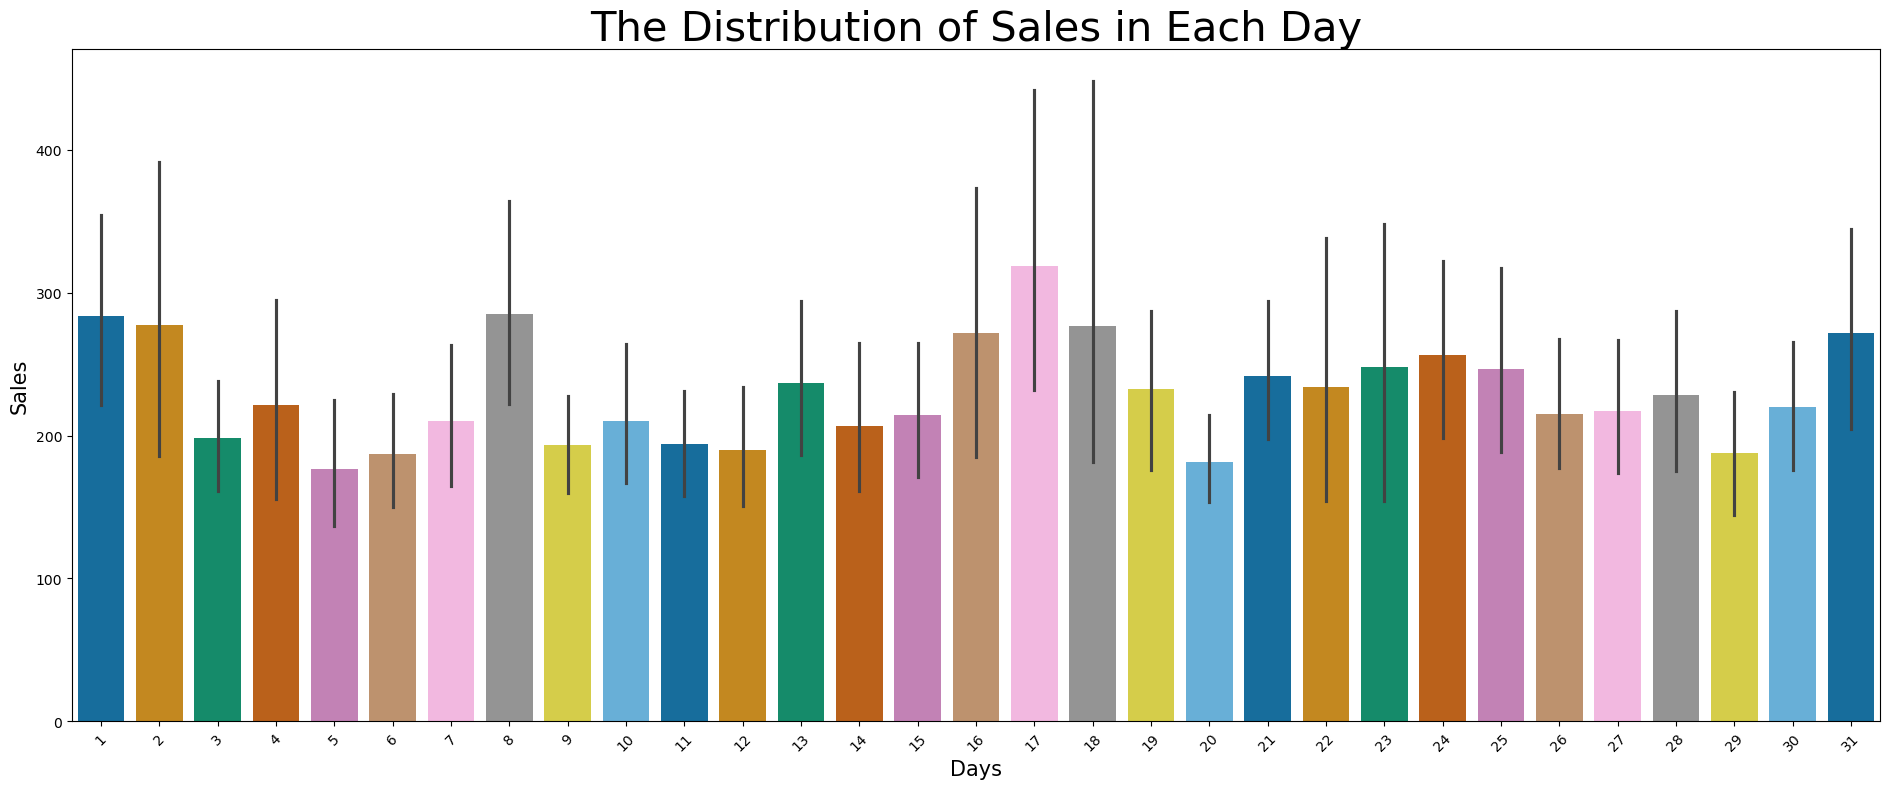

In [191]:
# Visualizing day-wise sales distribution
plt.rcParams['figure.figsize'] = (19, 8)
sns.barplot(x='Date', y='Sales', hue='Date', data=df, palectte='colorblind', legend=False)
plt.title('The Distribution of Sales in Each Day', fontsize=30)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# It is mostly observed highest at the mid of the month

In [ ]:
Time Series Analysis of Sales and Order Date

In [193]:
# Extracting them in separate dataframe
features=['Order Date','Sales']
salesplot=df[features]
salesplot.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [210]:
salesplot.sort_values(by='Order Date', inplace=True)
salesplot

,Order Date,Sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
1296,2017-12-30,13.904
1297,2017-12-30,20.720
645,2017-12-30,209.300
5091,2017-12-30,3.024


In [ ]:
# Visualizing the Sales Prices as per the Order Date

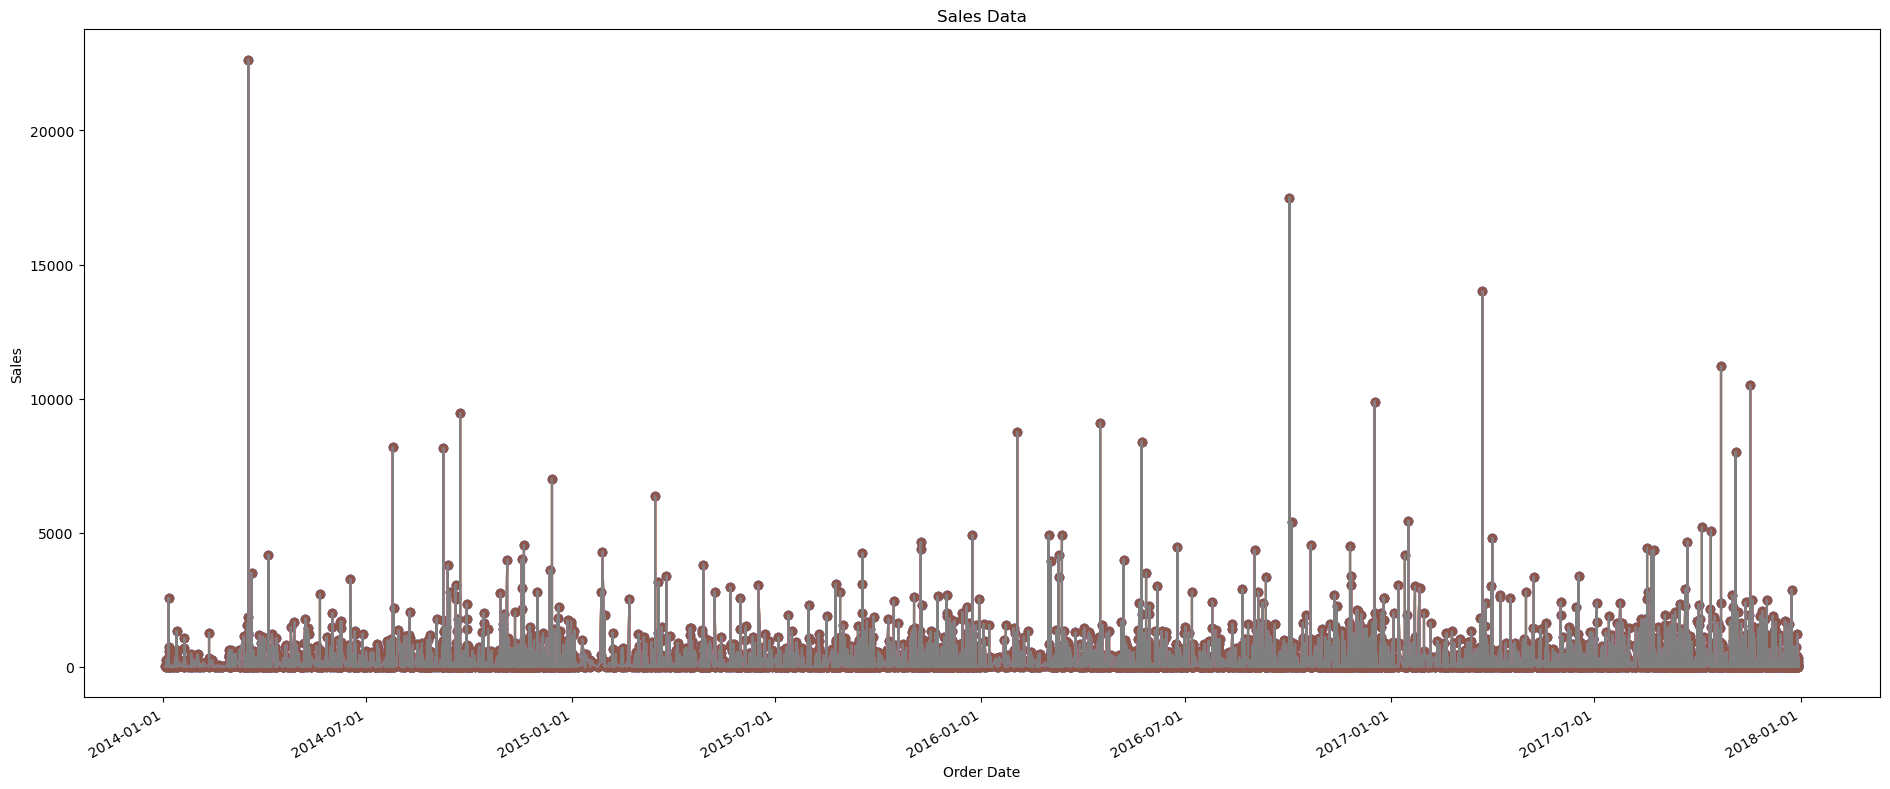

In [229]:
import matplotlib.dates as mdates
plt.plot(Order_date, Sales)  
plt.gcf().autofmt_xdate()   
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.title('Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

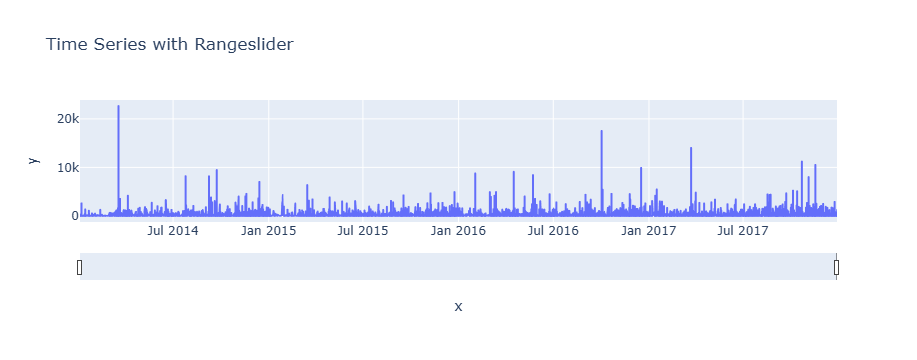

In [242]:
#interactive visualization using plotly
import plotly.express as px
fig = px.line(salesplot, x=Order_date, y=Sales, title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
#Slide the above slider towards right or left to zoom in or zoom out the graph to view specific dates.
#Also at the top right corner hover the cursor to explore more options. 
#You can also hover over the graph to view the SALES PRICE on specific date.

In [ ]:
Conclusion:
This project analyzed sales data to find patterns and trends using Pandas and Matplotlib. 
It revealed peak sales months, product-wise performance, and seasonal trends. 
These insights can help improve business decisions and future sales planning.